In [1]:
from aqua import Reader
from tropical_rainfall import Tropical_Rainfall

In [7]:
diag = Tropical_Rainfall(loglevel='warning')


from aqua.util import ConfigPath
machine = ConfigPath().get_machine()

if machine == 'lumi':
    path_to_output = "/pfs/lustrep3/projappl/project_465000454/nazarova/output/"
    path_to_observations = "/pfs/lustrep3/projappl/project_465000454/nazarova/observations/"
elif machine == 'levante':
    path_to_output = "/work/bb1153/b382267/output/"
    path_to_observations = "/work/bb1153/b382267/observations/"

In [53]:
import xarray as xr

def calculate_sum_of_pdf(data):
    pdf_1 = data.counts / (data.pdf.size_of_the_data * data.width)
    pdf_2 = data.pdf

    def _calculate_pdf_sum(pdf):
        pdf_per_bin = xr.DataArray(pdf, coords={"center_of_bin": data.pdf.center_of_bin}, dims=["center_of_bin"])
        pdf_per_bin = pdf_per_bin.assign_coords(width=("center_of_bin", data.width.values))
        return (pdf_per_bin * data.width).sum().values

    # Calculate the sum of PDFs
    return _calculate_pdf_sum(pdf_1), _calculate_pdf_sum(pdf_2)

## For tropical band -15, 15

mswep: sum_of_pdf_1 (based on counts) = 0.9999999856088508, sum_of_pdf_2 (based on pdf) = 0.9999999856088508
icon, historical-1990: sum_of_pdf_1 (based on counts) = 1.0, sum_of_pdf_2 (based on pdf) = 1.0
ifs-nemo, historical-1990: sum_of_pdf_1 (based on counts) = 0.9999999999999999, sum_of_pdf_2 (based on pdf) = 0.9999999999999999
icon, ssp370: sum_of_pdf_1 (based on counts) = 1.0, sum_of_pdf_2 (based on pdf) = 1.0
ifs-nemo, ssp370: sum_of_pdf_1 (based on counts) = 0.9999999999999999, sum_of_pdf_2 (based on pdf) = 0.9999999999999999


({<Axes: title={'center': 'r010, 3H, latitude band: [-15, 15]'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 960x600 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall_highres_comparison_PDF_histogram.pdf')

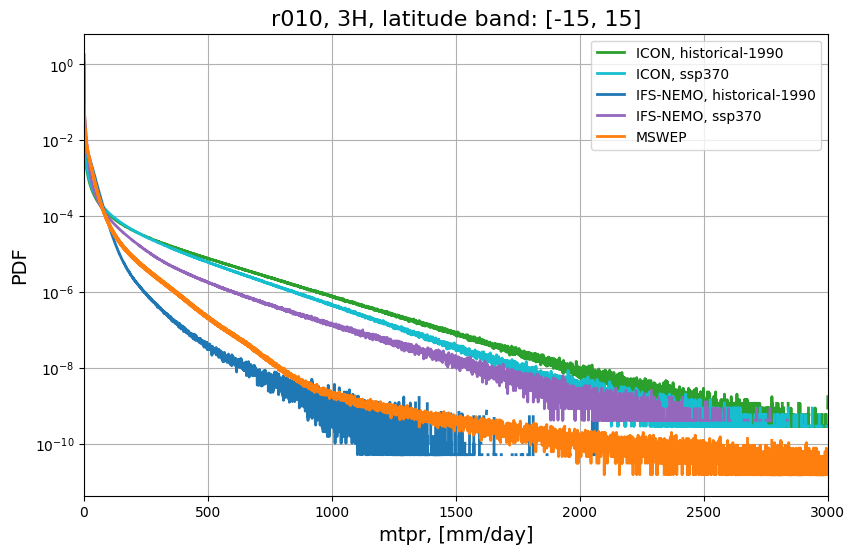

In [52]:
plot_title = 'r010, 3H, latitude band: [-15, 15]'
xlogscale = False
loc='upper right'
name_of_file = 'highres_comparison'
xmax=3000

mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r010/3H/trop_rainfall_r010_3H_histogram_0-0_5000-0_10000_1980-01-01T00_2020-12-31T00_3H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r010/3H/trop_rainfall_trop_lat_15_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-02-29T21_3H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r010/3H/trop_rainfall_trop_lat_15_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_2002-02-28T21_3H.nc')
icon_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/ICON_ssp370/r010/3H/trop_rainfall_trop_lat_15_r010_3H_histogram_0-0_5000-0_10000_2020-01-01T00_2022-02-28T21_3H.nc')
ifs_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_ssp370/r010/3H/trop_rainfall_trop_lat_15_r010_3H_histogram_0-0_5000-0_10000_2028-07-01T00_2029-12-31T21_3H.nc')


datasets = [
    ("mswep", mswep_merged),
    ("icon, historical-1990", icon_merged),
    ("ifs-nemo, historical-1990", ifs_merged),
    ("icon, ssp370", icon_ssp370),
    ("ifs-nemo, ssp370", ifs_ssp370)
]

for label, dataset in datasets:
    sum_of_pdf_1, sum_of_pdf_2 = calculate_sum_of_pdf(dataset)
    print(f"{label}: sum_of_pdf_1 (based on counts) = {sum_of_pdf_1}, sum_of_pdf_2 (based on pdf) = {sum_of_pdf_2}")
    


add, _ = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(icon_ssp370, add=add,
                            pdf=True, legend="ICON, ssp370", color='tab:cyan', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
add, path_to_generated_plot = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:purple', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc=loc, figsize=1.2, smooth=True, xlogscale=xlogscale, xmax=xmax)

## For tropical band -45, 45

mswep: sum_of_pdf_1 (based on counts) = 0.9999999946555171, sum_of_pdf_2 (based on pdf) = 0.9999999946555171
icon, historical-1990: sum_of_pdf_1 (based on counts) = 0.9999999998120328, sum_of_pdf_2 (based on pdf) = 0.9999999998120328
ifs-nemo, historical-1990: sum_of_pdf_1 (based on counts) = 1.0, sum_of_pdf_2 (based on pdf) = 1.0
icon, ssp370: sum_of_pdf_1 (based on counts) = 0.9999999998735073, sum_of_pdf_2 (based on pdf) = 0.9999999998735073
ifs-nemo, ssp370: sum_of_pdf_1 (based on counts) = 1.0, sum_of_pdf_2 (based on pdf) = 1.0


({<Axes: title={'center': 'r010, 3H, latitude band: [-45, 45]'}, xlabel='mtpr, [mm/day]', ylabel='PDF'>,
  <Figure size 960x600 with 1 Axes>},
 '/work/bb1153/b382267/tropical_rainfall_cicle3/PDF/trop_rainfall_highres_comparison_PDF_histogram.pdf')

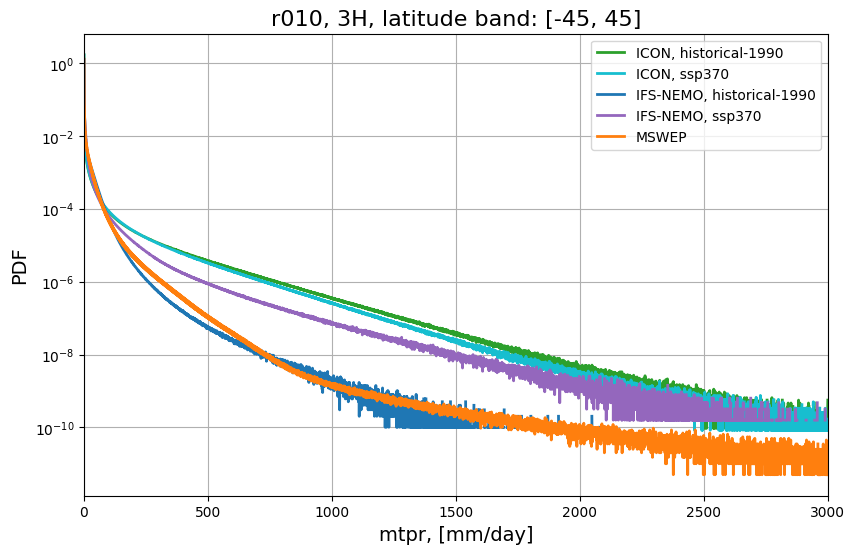

In [51]:
plot_title = 'r010, 3H, latitude band: [-45, 45]'
xlogscale = False
loc='upper right'
xmax=3000
name_of_file = 'highres_comparison'

mswep_merged =  diag.tools.open_dataset(path_to_observations+'MSWEP/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1979-01-01T09_2020-12-31T00_3H.nc')
icon_merged = diag.tools.open_dataset(path_to_output+'netcdf/ICON_historical-1990/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-03-31T21_3H.nc')
ifs_merged = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_historical-1990/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_1990-01-01T00_1992-01-31T21_3H.nc')
icon_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/ICON_ssp370/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_2022-03-01T00_2024-08-31T21_3H.nc')
ifs_ssp370 = diag.tools.open_dataset(path_to_output+'netcdf/IFS-NEMO_ssp370/r010/3H/trop_rainfall_trop_lat_45_r010_3H_histogram_0-0_5000-0_10000_2030-02-01T00_2031-05-31T21_3H.nc')

# Example usage
datasets = [
    ("mswep", mswep_merged),
    ("icon, historical-1990", icon_merged),
    ("ifs-nemo, historical-1990", ifs_merged),
    ("icon, ssp370", icon_ssp370),
    ("ifs-nemo, ssp370", ifs_ssp370)
]

for label, dataset in datasets:
    sum_of_pdf_1, sum_of_pdf_2 = calculate_sum_of_pdf(dataset)
    print(f"{label}: sum_of_pdf_1 (based on counts) = {sum_of_pdf_1}, sum_of_pdf_2 (based on pdf) = {sum_of_pdf_2}")
    


add, _ = diag.histogram_plot(icon_merged,
                            pdf=True, legend="ICON, historical-1990", color='tab:green', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(icon_ssp370, add=add,
                            pdf=True, legend="ICON, ssp370", color='tab:cyan', name_of_file=name_of_file,
                            xlogscale=xlogscale, smooth=True, plot_title=plot_title, linewidth=2)
add, _ = diag.histogram_plot(ifs_merged, add=add,
                            pdf=True, legend="IFS-NEMO, historical-1990", color='tab:blue', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
add, path_to_generated_plot = diag.histogram_plot(ifs_ssp370, add=add,
                            pdf=True, legend="IFS-NEMO, ssp370", color='tab:purple', linewidth=2, name_of_file=name_of_file,
                            smooth=True, xlogscale=xlogscale, plot_title=plot_title)
diag.histogram_plot(mswep_merged, add=add, pdf=True,  color='tab:orange', legend="MSWEP",  linewidth=2, name_of_file=name_of_file,
                    plot_title=plot_title, loc=loc, figsize=1.2, smooth=True, xlogscale=xlogscale, xmax=xmax)